In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000

In [3]:
ip = np.random.rand(N) > 0.5
ip = ip.astype(int)

In [4]:
Es = 1

In [5]:
eb_no_db = np.arange(0,30)

In [6]:
capacity_rate_CSIT_reduced = np.zeros(len(eb_no_db))

In [7]:
def sigma_fourth(S1,S2,S3,S4,noise_variance,Es) :
    
    S = [S1 , S2 , S3, S4 ]
    
    mu = 0
    
    qi_values = []
    
    
    
    for kk in range(len(S)):
        
        mu = mu + (noise_variance/np.square(S[kk]))
        
    mu = Es + mu   
    
      
    
    for mm in range(len(S)):
        
        qi = mu - (noise_variance/np.square(S[mm]))
        
        if(qi > 0 ):
            
            qi_values.append(qi)
            
        else:
            
            break
        
      
            
    return  qi_values  


    

In [8]:
def sigma_third(S1,S2,S3,noise_variance,Es):
    
    S = [S1 , S2 , S3]
    
    mu = 0
    
    qi_values = []
    
    
    
    for kk in range(len(S)):
        
        mu = mu + (noise_variance/np.square(S[kk]))
        
    mu = Es + mu    
     
    
    for mm in range(len(S)):
        
        qi = mu - (noise_variance/np.square(S[mm]))
        
        if(qi > 0 ):
            
            qi_values.append(qi)
            
        else:
            
            break
        
      
            
    return  qi_values  
            
        
        

In [9]:
def sigma_second(S1,S2,noise_variance,Es):
    
    S = [S1 , S2]
    
    mu = 0
    
    qi_values = []
    
    
    
    for kk in range(len(S)):
        
        mu = mu + (noise_variance/np.square(S[kk]))
        
    mu = Es + mu    
    
       
    
    for mm in range(len(S)):
        
        qi = mu - (noise_variance/np.square(S[mm]))
        
        if(qi > 0 ):
            
            qi_values.append(qi)
            
        else:
            
            break
        
      
            
    return  qi_values       
        
        

In [10]:
def sigma_first(S1,noise_variance,Es):
    
    mu = Es + (noise_variance/np.square(S1))
    
    qi_values = []
    
    qi = mu - (noise_variance/np.square(S1))
    
    if(qi > 0 ):
        
        qi_values.append(qi)
        
    return qi_values
        

In [11]:
def q_optimal(S,noise_variance,Es):
    
    S = S
    
    noise_variance = noise_variance 
    
    Es = Es
    
    S1 = S[0]
    
    S2 = S[1]
    
    S3 = S[2]
    
    S4 = S[3]
    
    sigma_one =  sigma_first(S1,noise_variance,Es)
    
    sigma_two = sigma_second(S1,S2,noise_variance,Es)
    
    sigma_three = sigma_third(S1,S2,S3,noise_variance,Es)
    
    sigma_four = sigma_fourth(S1,S2,S3,S4,noise_variance,Es)
    
    optimal_sigma  = max(sigma_one,sigma_two,sigma_three,sigma_four)
    
    return optimal_sigma

   

In [12]:
def water_filling(nTx,nRx,noise_variance,Es):
    
    total_capacity = 0
    
    for ii in range(N):
        
        H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
        
        U,S,Vh = np.linalg.svd(H)
        
        
        q_optimal_values = q_optimal(S,noise_variance,Es)
        
        capacity = 0
        
        for jj in range(len(q_optimal_values)):
            
            c = np.log2(1 + (1/noise_variance) * np.square(S[jj]) * q_optimal_values[jj] )
            
            capacity = capacity + c
        
        total_capacity = total_capacity + capacity
        
    return total_capacity
    

In [13]:
def Reduced_CSIT():
    
    for jj in range(len(eb_no_db)):
        
        nTx = 4
        
        nRx = 4
        
        Es = 1
        
        noise_variance = 10**(-eb_no_db[jj] / 10)
        
        capacity = water_filling(nTx,nRx,noise_variance,Es) 
        
        capacity = capacity / N
        
        capacity_rate_CSIT_reduced[jj] = capacity
        
    return capacity_rate_CSIT_reduced
        

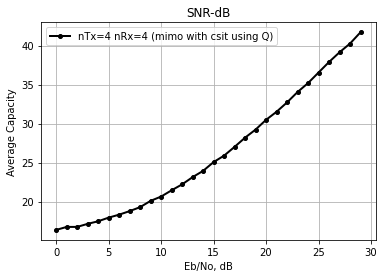

In [14]:
reduced_capacity = Reduced_CSIT()

plt.figure()
plt.plot(eb_no_db, reduced_capacity, 'ko-', linewidth=2, markersize=4, label='nTx=4 nRx=4 (mimo with csit using Q)')
plt.grid(True)

plt.legend()

plt.xlabel('Eb/No, dB')

plt.ylabel('Average Capacity')

plt.title('SNR-dB')

plt.show()